# Quality Management 
Dataset note

    1.pH: This feature defines pH of the milk, which is in the range of 3 to 9.5.
    
    2.Temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.
    
    3.Taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    4.Odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    5.Fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    6.Turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    7.Color: This feature defines the color of the milk, which is in the range of 240 to 255.
    
    8.Grade: This is the target and takes the values: low_quality,medium_quality or high_quality.

Quality Management Team – Answer the following two questions:

How has the process performed following the corporation’s business development orientation?
→ Evaluate the current milk quality based on actual data, using statistical analysis and classification models.

What can he do to improve his process under the concept of continuous improvement?
→ Propose a quality improvement process (e.g., TQM, DMAIC, or PDCA) to enhance product quality.

In [760]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from matplotlib import pyplot as plt, font_manager as fm
import math
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [761]:
#Loading the data
df = pd.read_csv(r'/Users/huynhthuybaotram/Desktop/SCLM 449 Mr B /milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


# Data pre-processing and EDA

In [763]:
df.duplicated().sum()

976

In [764]:
df.loc[df.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [766]:
df.describe().round(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.00,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000
mean,6.63,44.227,0.547,0.432,0.671,0.491,251.840
std,1.40,10.098,0.498,0.496,0.470,0.500,4.307
min,3.00,34.000,0.000,0.000,0.000,0.000,240.000
25%,6.50,38.000,0.000,0.000,0.000,0.000,250.000
50%,6.70,41.000,1.000,0.000,1.000,0.000,255.000
75%,6.80,45.000,1.000,1.000,1.000,1.000,255.000
max,9.50,90.000,1.000,1.000,1.000,1.000,255.000


In [767]:
df.shape

(1059, 8)

In [768]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [769]:
df.nunique() 

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [770]:

# Rename the 'Fat ' column to 'Fat' for easier use
df.rename(columns={'Fat ': 'Fat'}, inplace=True)


# Exploratory Data Analysis

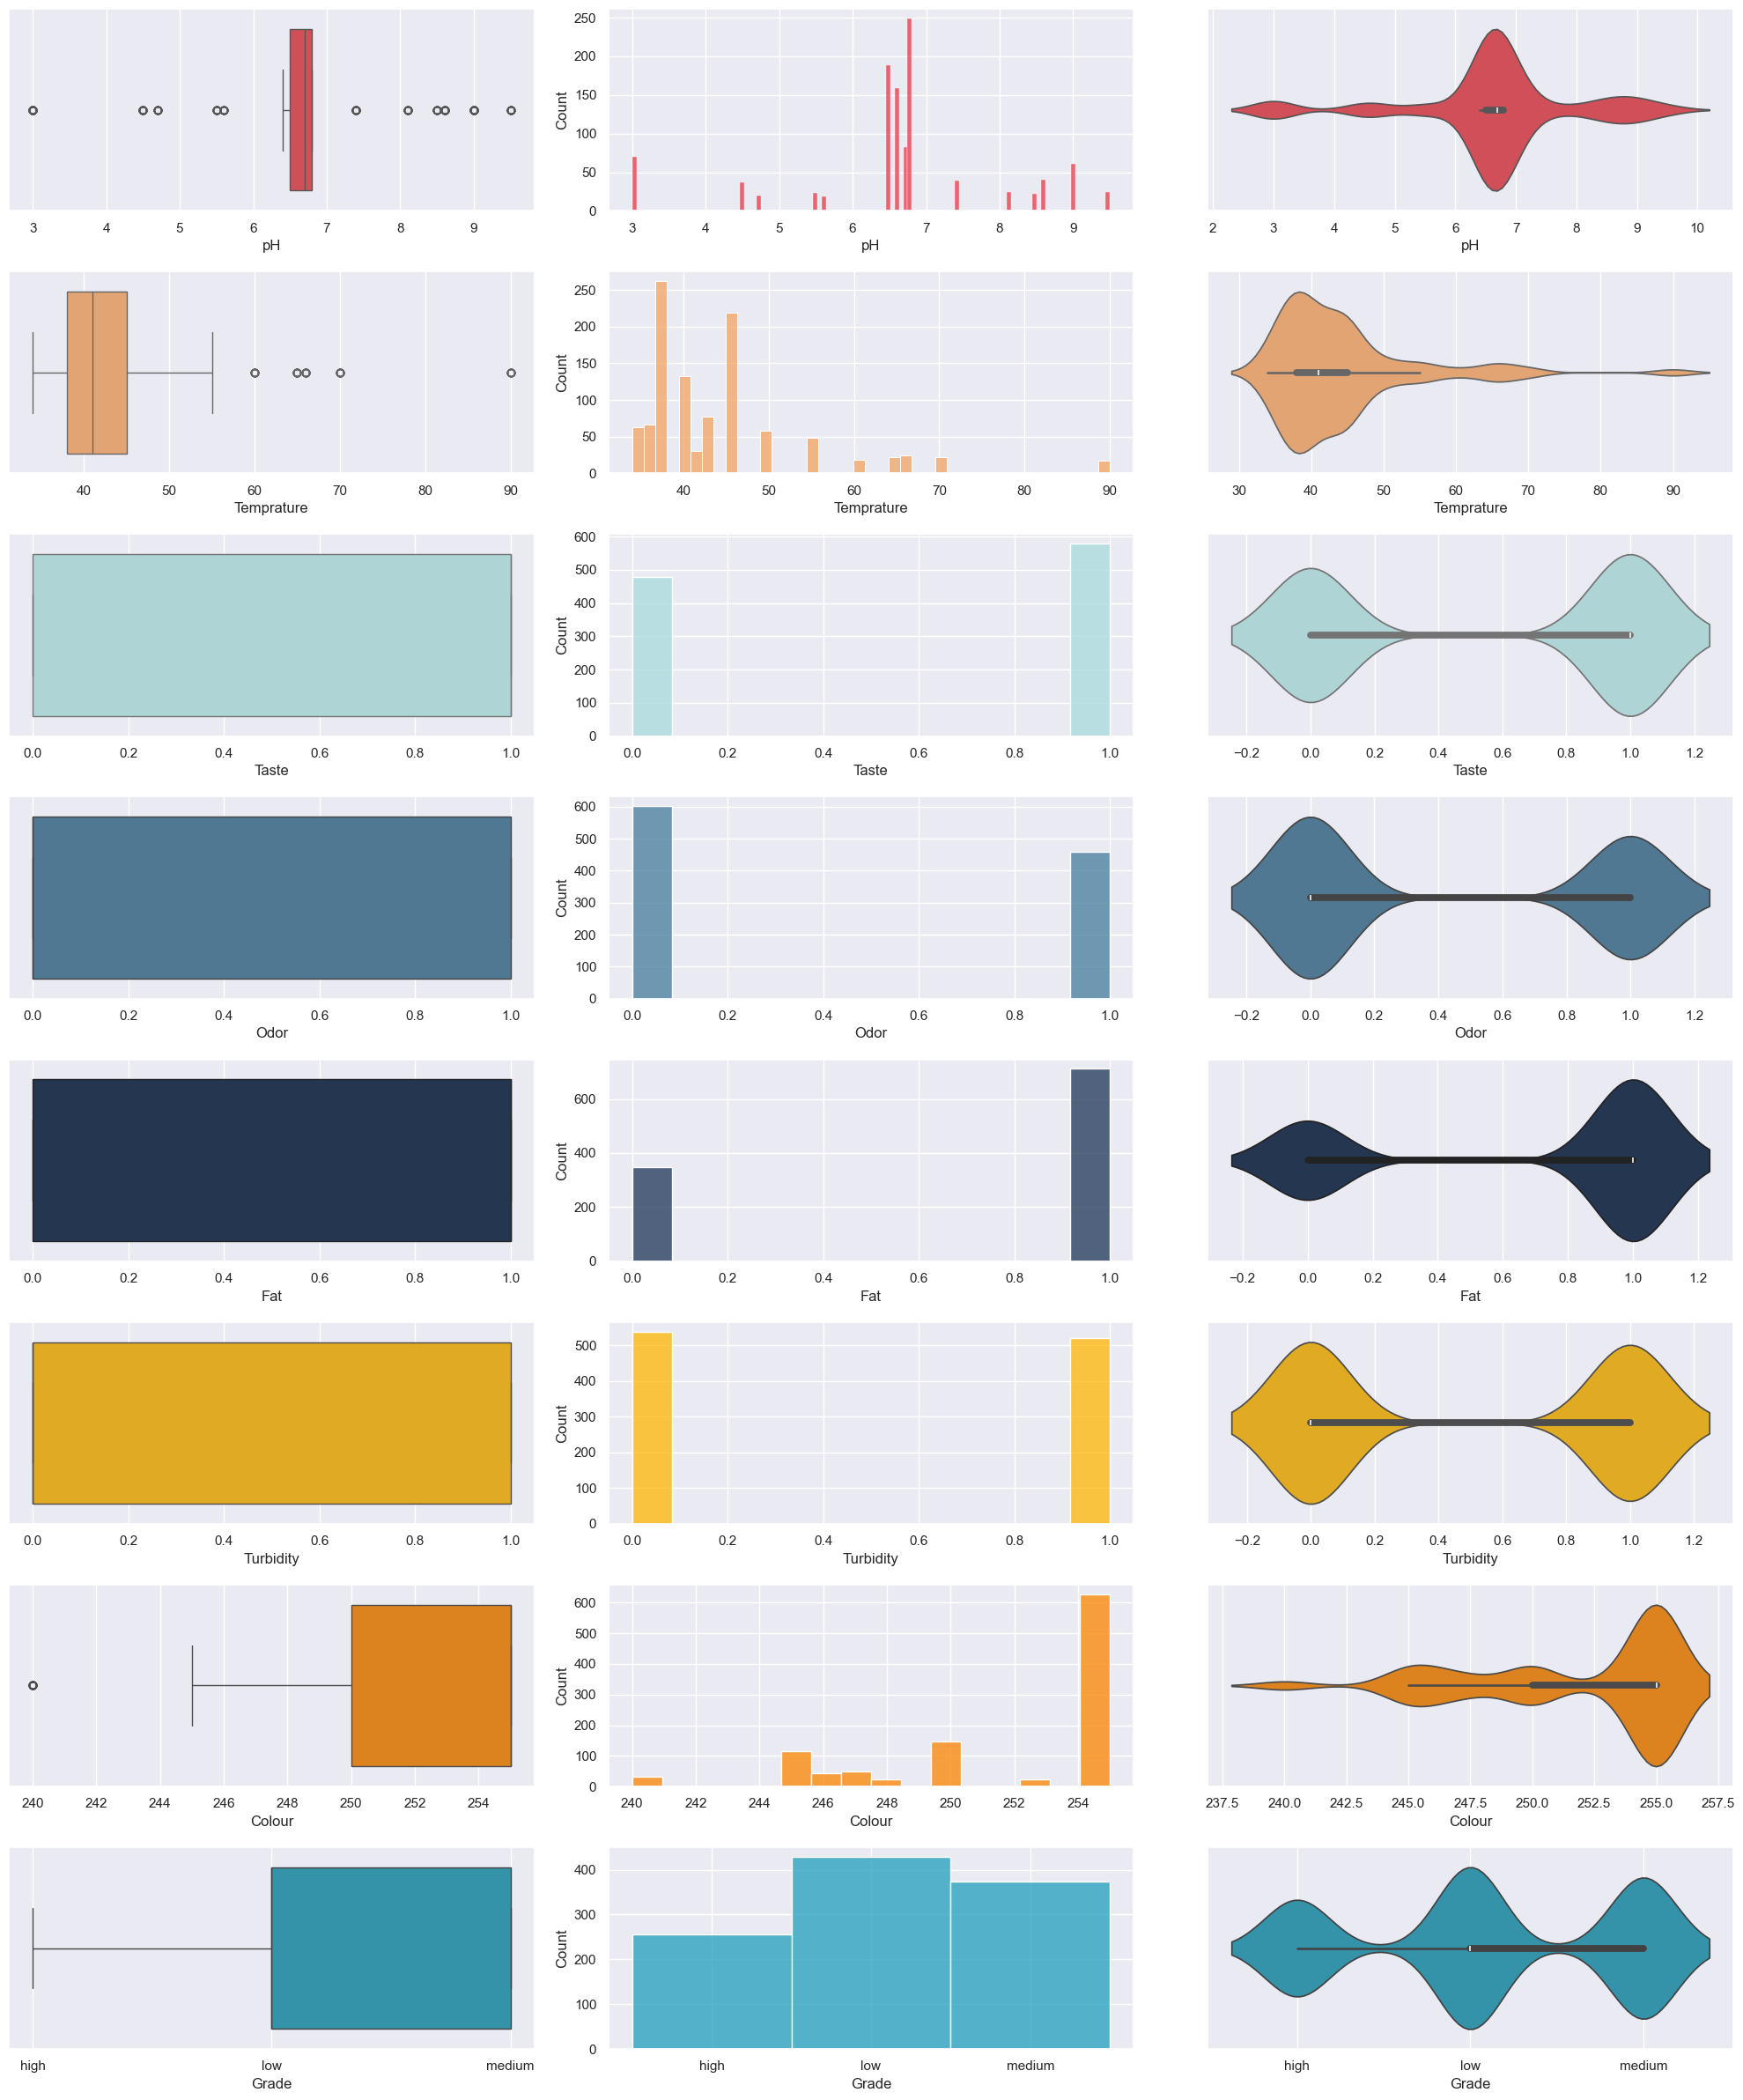

In [772]:
num_vars = len(df.columns)
f, axes = plt.subplots(nrows=num_vars, ncols=3, figsize=(20, num_vars*3))
if num_vars == 1:
    axes = axes.reshape(1, 3)

colors = ["#E63946", "#F4A261", "#A8DADC", "#457B9D", "#1D3557",
          "#FFB703", "#FB8500", "#219EBC", "#8ECAE6", "#8338EC", "#FF006E"]

for count, var in enumerate(df.columns):
    color = colors[count % len(colors)]  
    sb.boxplot(data=df[var], orient="h", color=color, ax=axes[count,0])
    sb.histplot(data=df[var], color=color, ax=axes[count,1])
    sb.violinplot(data=df[var], orient="h", color=color, ax=axes[count,2])

plt.tight_layout()
plt.savefig("descriptivesta.png", dpi=300, bbox_inches='tight')
plt.show()

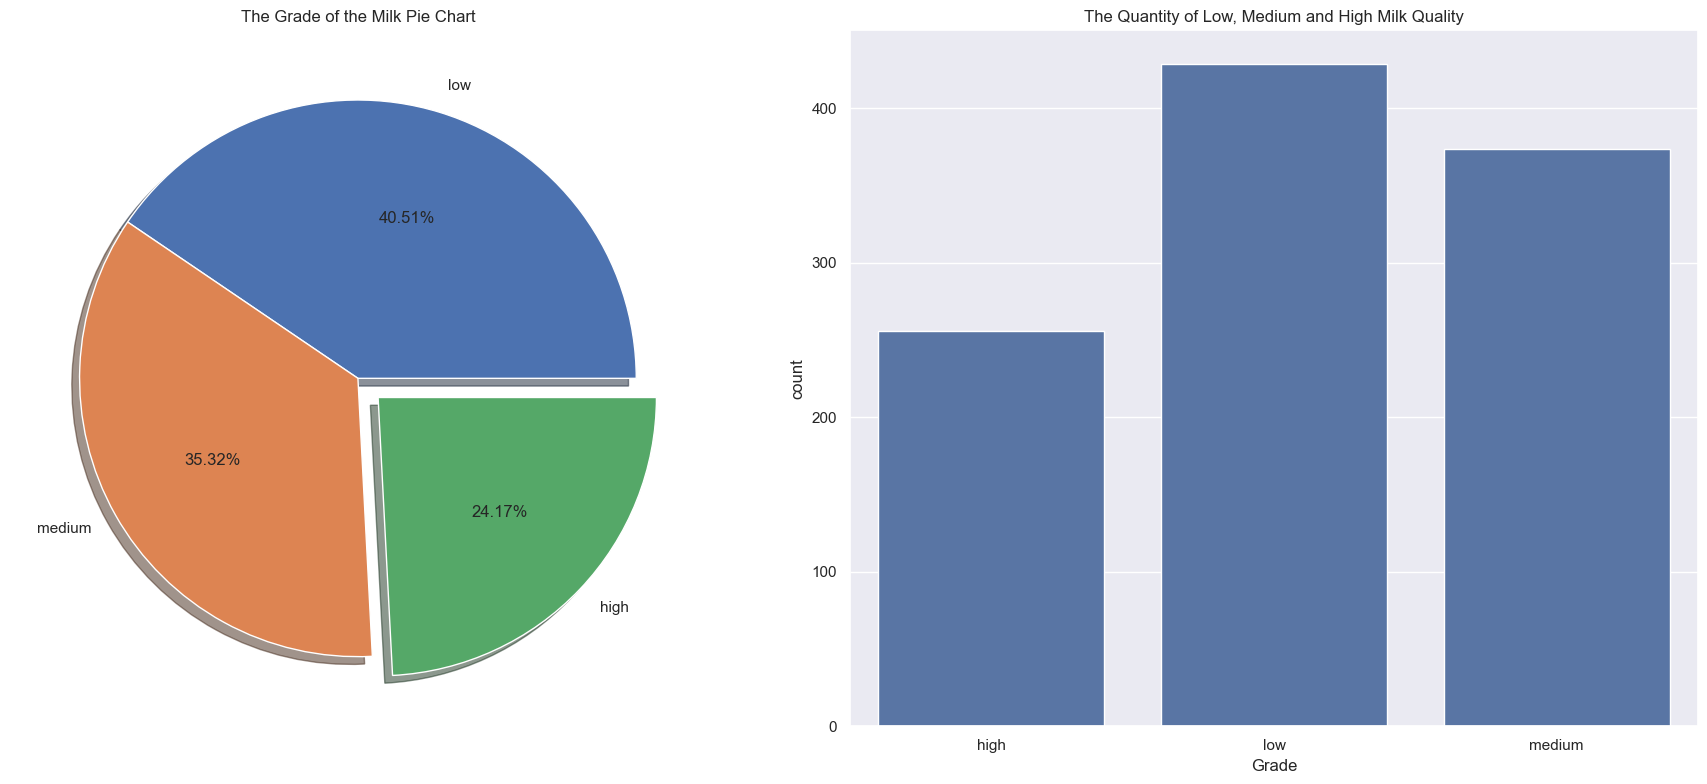

In [773]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Grade'].value_counts().plot.pie(
    explode=[0, 0, 0.1],
    ax=ax[0],
    autopct='%.2f%%',
    shadow=True
)
ax[0].set_title('The Grade of the Milk Pie Chart')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Grade', data=df, ax=ax[1])
ax[1].set_title('The Quantity of Low, Medium and High Milk Quality')

plt.tight_layout()
plt.show()

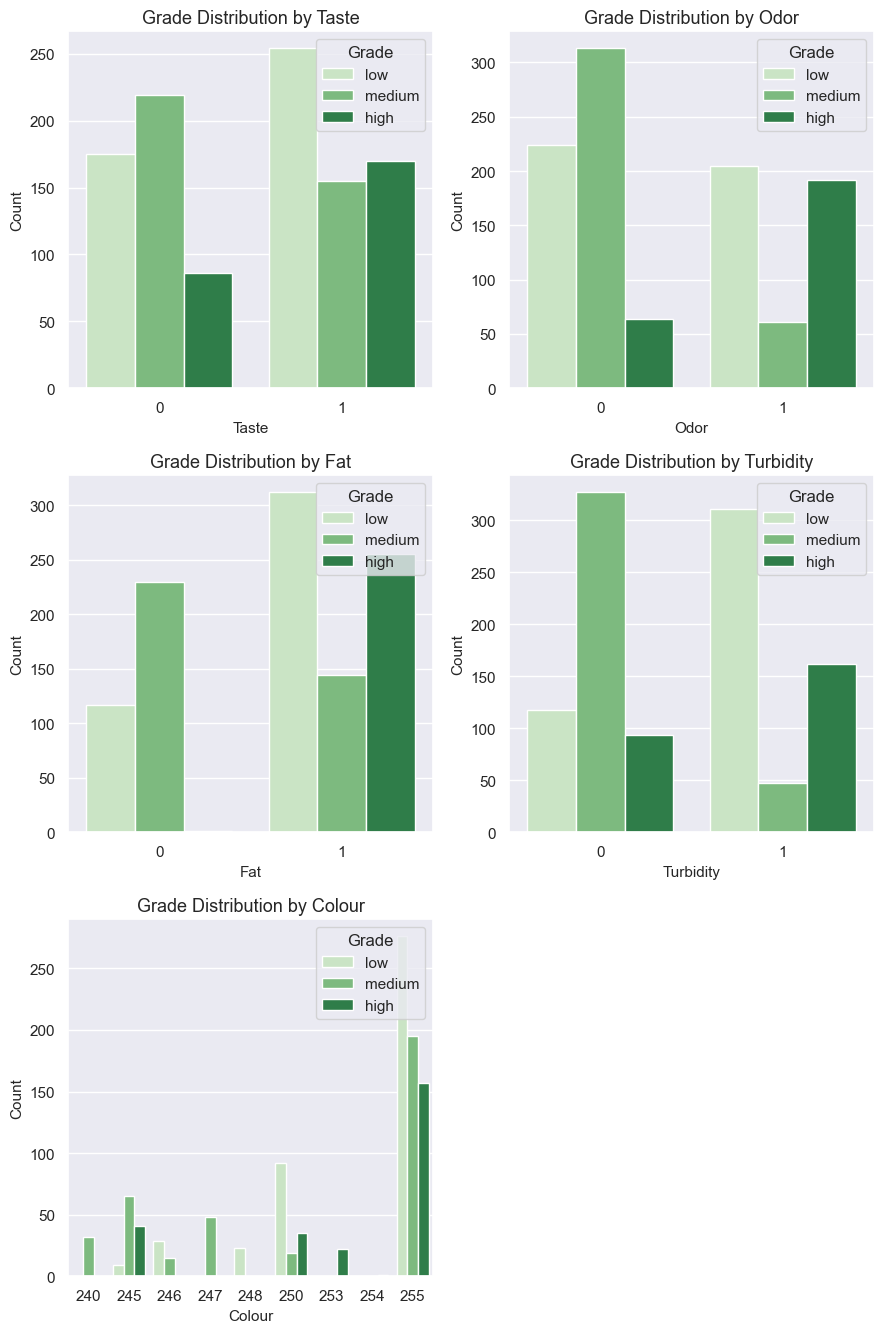

In [774]:
# Select the categorical columns for the count plots
cols = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']

# Define the fixed order for the hue legend
grade_order = ['low', 'medium', 'high']   

# Define subplot layout
n_rows = 3
n_cols = 2

# Create the figure and axes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 4.5))
ax = ax.flatten()

# Iterate through the columns to create count plots
for i, col in enumerate(cols):
    ax_i = ax[i]
    sns.countplot(
        data=df,
        x=col,
        hue='Grade',
        hue_order=grade_order,   
        palette='Greens',
        ax=ax_i
    )

    ax_i.set_title(f"Grade Distribution by {col}", fontsize=13)
    ax_i.set_xlabel(col, fontsize=11)
    ax_i.set_ylabel("Count", fontsize=11)
    ax_i.legend(title='Grade', loc='upper right')

# Hide any unused subplot cells
for j in range(len(cols), n_rows * n_cols):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.savefig("distribution.png", dpi=300, bbox_inches='tight')
plt.show()


IMPORTANT NOTE:

Because of high process variation, a polarization effect occurs.

When a production process is unstable, the output tends to show more extreme values—meaning there are many very good (High) and very poor (Low) products, while the medium-quality group (Medium) becomes smaller.

In quality management:

A stable process → most products cluster around the average level (Medium).

An unstable process → many batches shift strongly toward the two extremes (High and Low).

Therefore, when a chart shows High and Low increasing while Medium decreases, it indicates that:

“The process lacks stability—some milk batches achieve very high quality, while others are of very poor quality.”

Example:
Some milk batches are processed properly, resulting in good taste, while other batches use the same formula but suffer from poor storage conditions, leading to inferior taste.

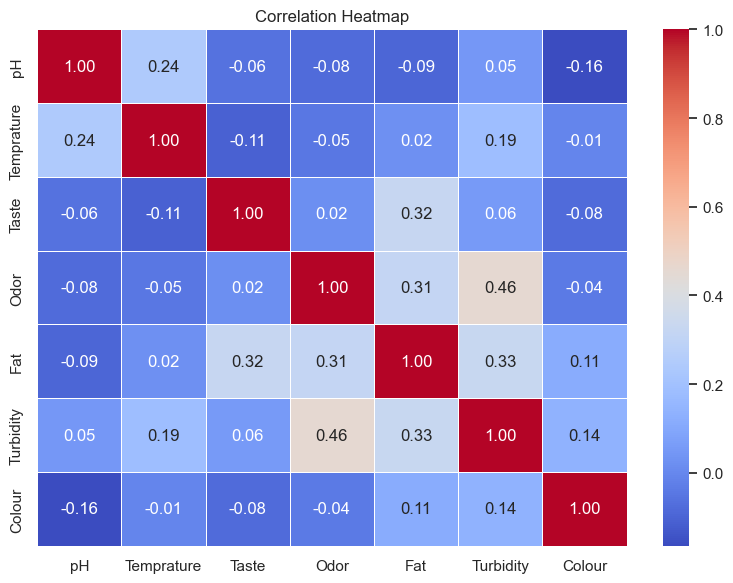

In [776]:
# Feature Selection
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## here:
 fat and taste and odor have slightly miltuple correl (0.32)
 That's means when fat and taste increase the taste will increase and opposise

turbidity and odor have a correlation 0.46 when the turbidity increases, the odor will increase.

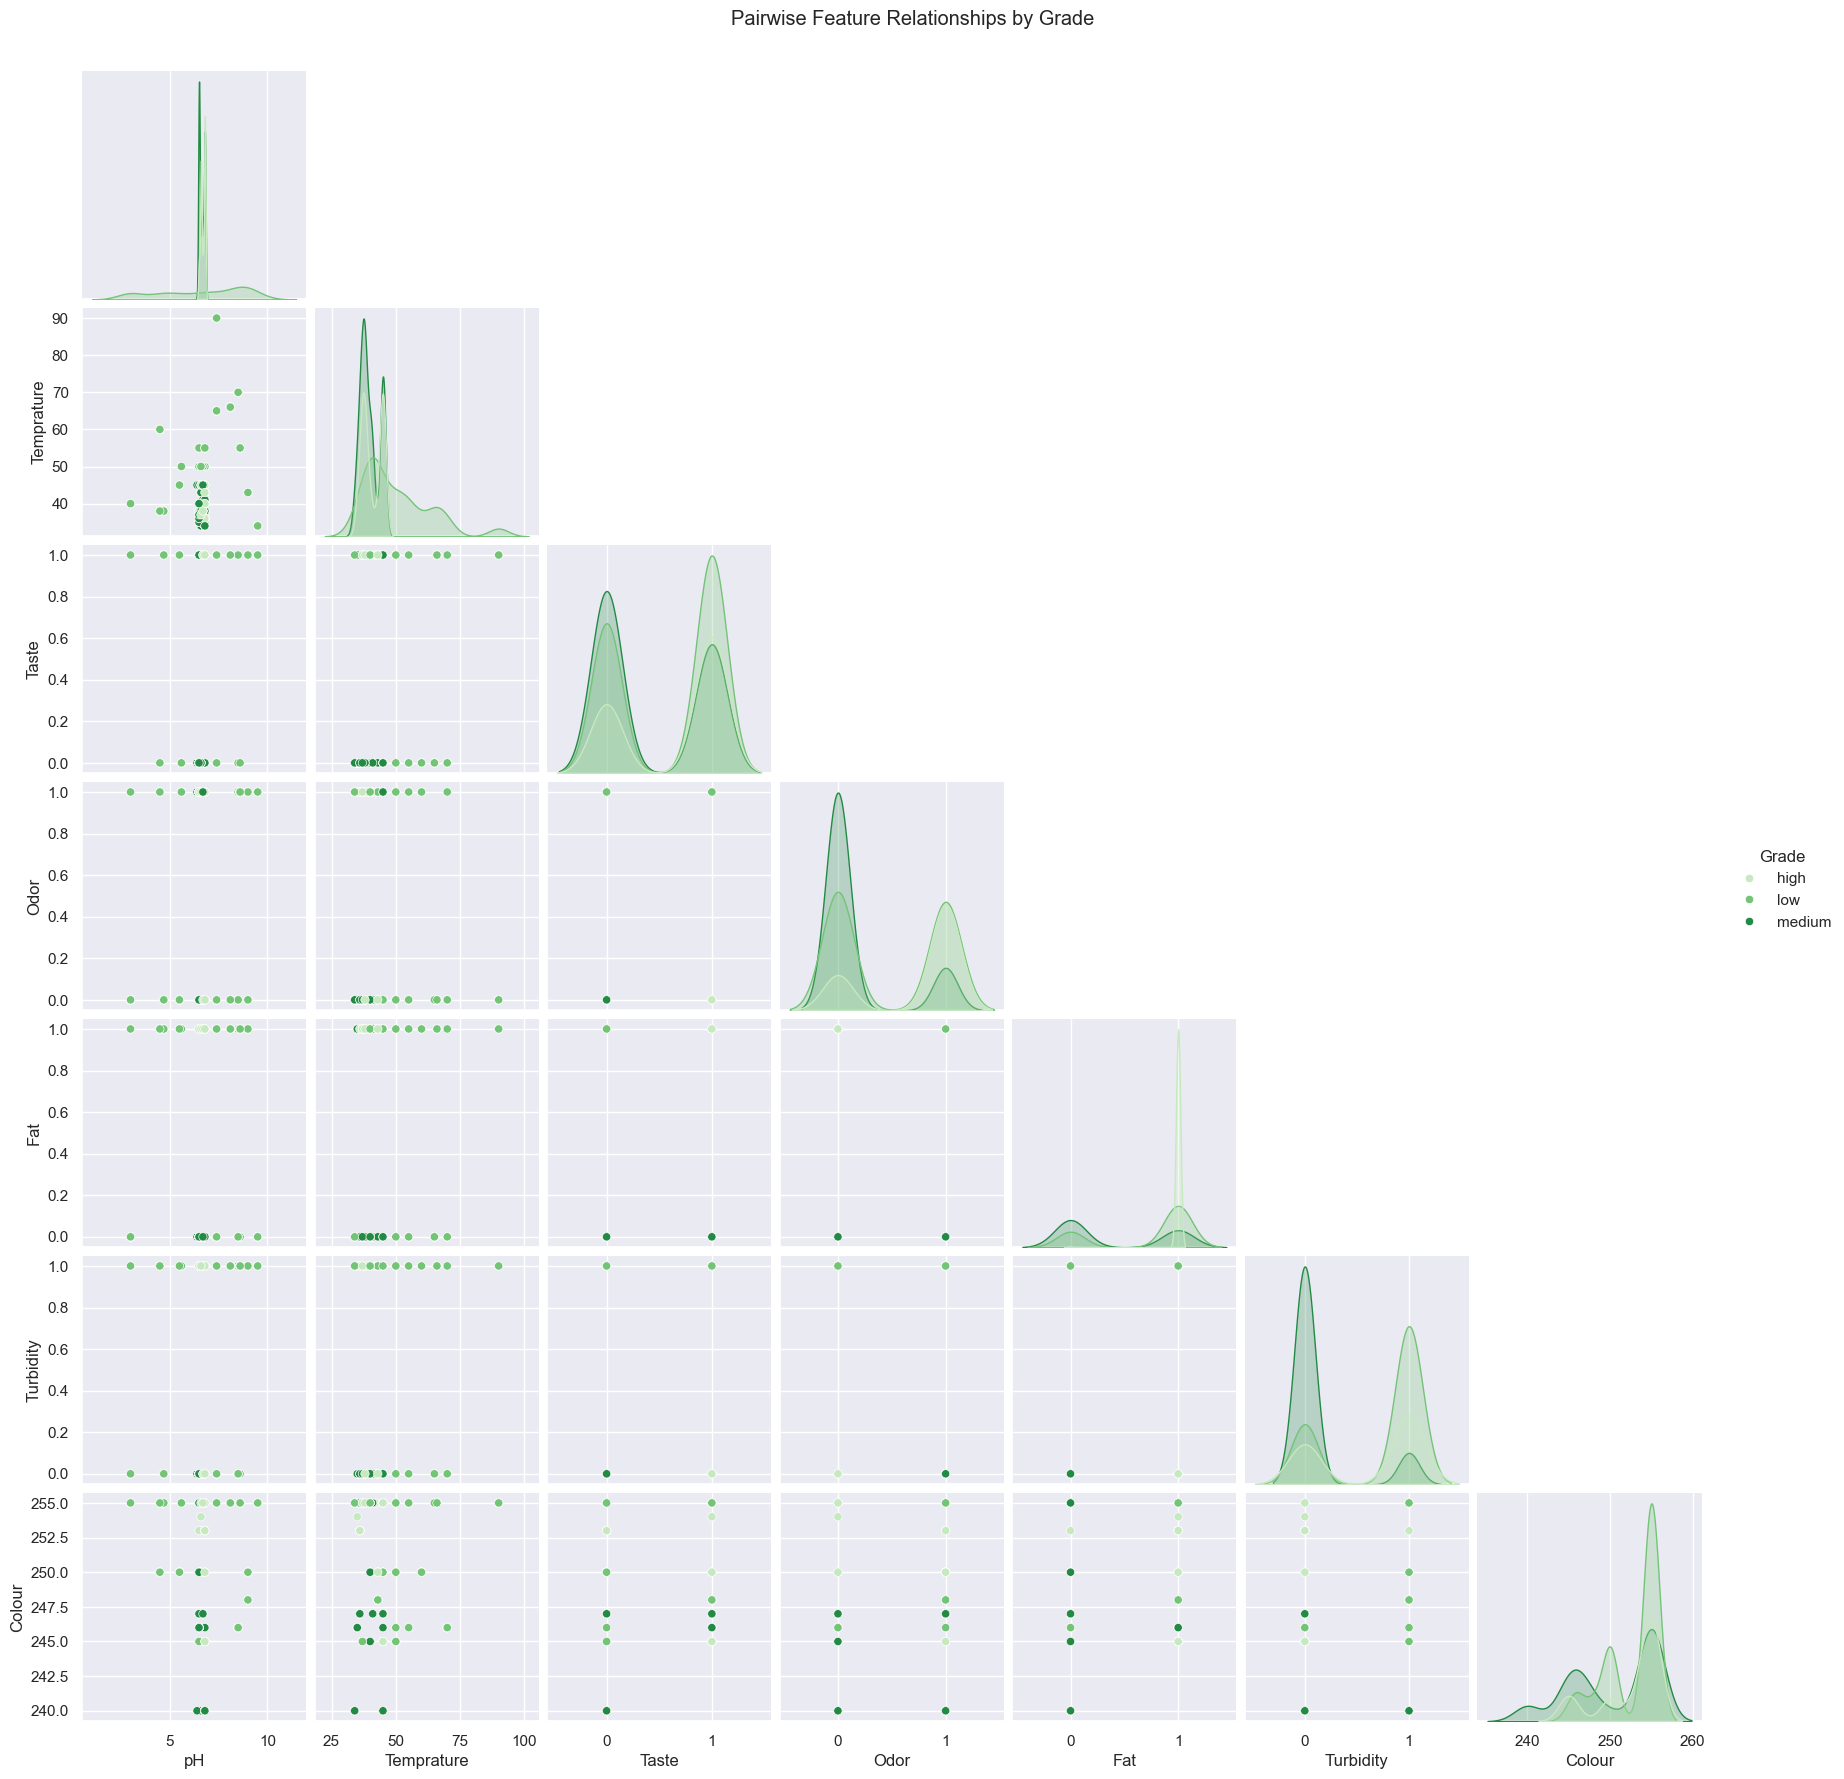

In [778]:
sns.pairplot(df, hue='Grade', diag_kind='kde', palette='Greens', corner=True)
plt.suptitle("Pairwise Feature Relationships by Grade", y=1.02)
plt.show()

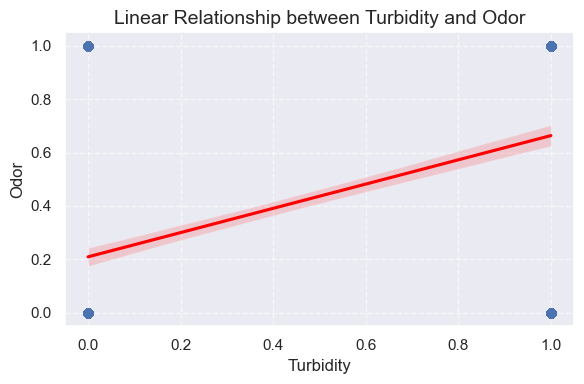

In [779]:
x_col = 'Turbidity'
y_col = 'Odor'

plt.figure(figsize=(6, 4))
sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title(f'Linear Relationship between {x_col} and {y_col}', fontsize=14)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

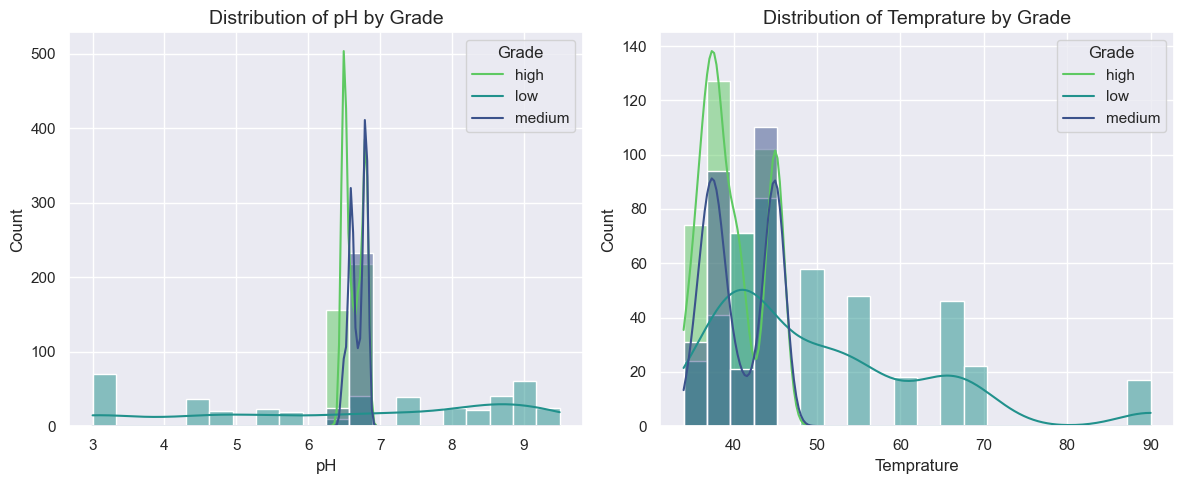

In [780]:
# Select the numerical columns for distribution plots
num_cols = ['pH', 'Temprature']
target_col = 'Grade'

# Create a figure with 1 row and 2 columns for the plots
n_rows = 1
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))

# Iterate through the numerical columns to create histplots
for i, col in enumerate(num_cols):
    ax_i = ax[i]
    # Create the histplot with KDE, colored by the target variable 'Grade'
    sns.histplot(data=df, x=col, hue=target_col, kde=True, bins=20, palette='viridis', ax=ax_i)

    # Set title and labels
    ax_i.set_title(f"Distribution of {col} by Grade", fontsize=14)
    ax_i.set_xlabel(col, fontsize=12)
    ax_i.set_ylabel("Count", fontsize=12)

    # Place legend
    ax_i.legend(title='Grade', labels=df[target_col].unique(), loc='upper right')

plt.tight_layout()
plt.show()

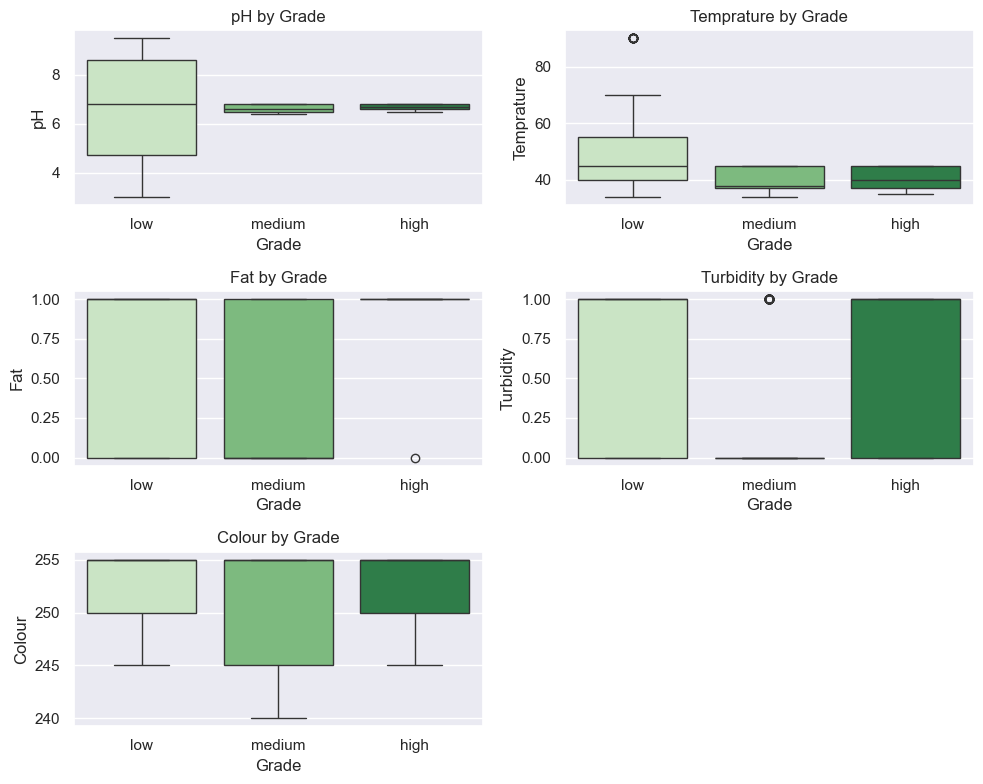

In [781]:
features = ['pH', 'Temprature', 'Fat', 'Turbidity', 'Colour']
plt.figure(figsize=(10, 8))

for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x='Grade', y=col, palette='Greens', order=['low','medium','high'])
    plt.title(f"{col} by Grade")
    plt.xlabel("Grade")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [782]:
#Group 1: Continuous variables (pH, Temperature, Colour)
group1 = ['pH', 'Temprature', 'Colour']

df.groupby('Grade')[group1] \
  .agg(['mean', 'std', 'min', 'max']) \
  .round(2)

pH                 Temprature                 Colour                
        mean   std  min  max       mean    std min max    mean   std  min  max
Grade                                                                         
high    6.69  0.11  6.5  6.8      40.65   3.74  35  45  252.54  3.71  245  255
low     6.59  2.19  3.0  9.5      50.29  13.04  34  90  252.73  3.23  245  255
medium  6.64  0.13  6.4  6.8      39.72   3.61  34  45  250.34  5.26  240  255

In [783]:
#: Binary variables (Taste, Odor, Fat, Turbidity
group2 = ['Taste', 'Odor', 'Fat', 'Turbidity']

df.groupby('Grade')[group2] \
  .agg(['mean', 'std', 'min', 'max']) \
  .round(2)

Taste                Odor                 Fat               Turbidity  \
        mean   std min max  mean   std min max  mean   std min max      mean   
Grade                                                                          
high    0.66  0.47   0   1  0.75  0.43   0   1  1.00  0.06   0   1      0.63   
low     0.59  0.49   0   1  0.48  0.50   0   1  0.73  0.45   0   1      0.72   
medium  0.41  0.49   0   1  0.16  0.37   0   1  0.39  0.49   0   1      0.13   

                      
         std min max  
Grade                 
high    0.48   0   1  
low     0.45   0   1  
medium  0.33   0   1

In [784]:
df.groupby('Grade')[['pH', 'Temprature']] \
  .agg(['mean', 'std', 'min', 'max']) \
  .round(2)

pH                 Temprature               
        mean   std  min  max       mean    std min max
Grade                                                 
high    6.69  0.11  6.5  6.8      40.65   3.74  35  45
low     6.59  2.19  3.0  9.5      50.29  13.04  34  90
medium  6.64  0.13  6.4  6.8      39.72   3.61  34  45

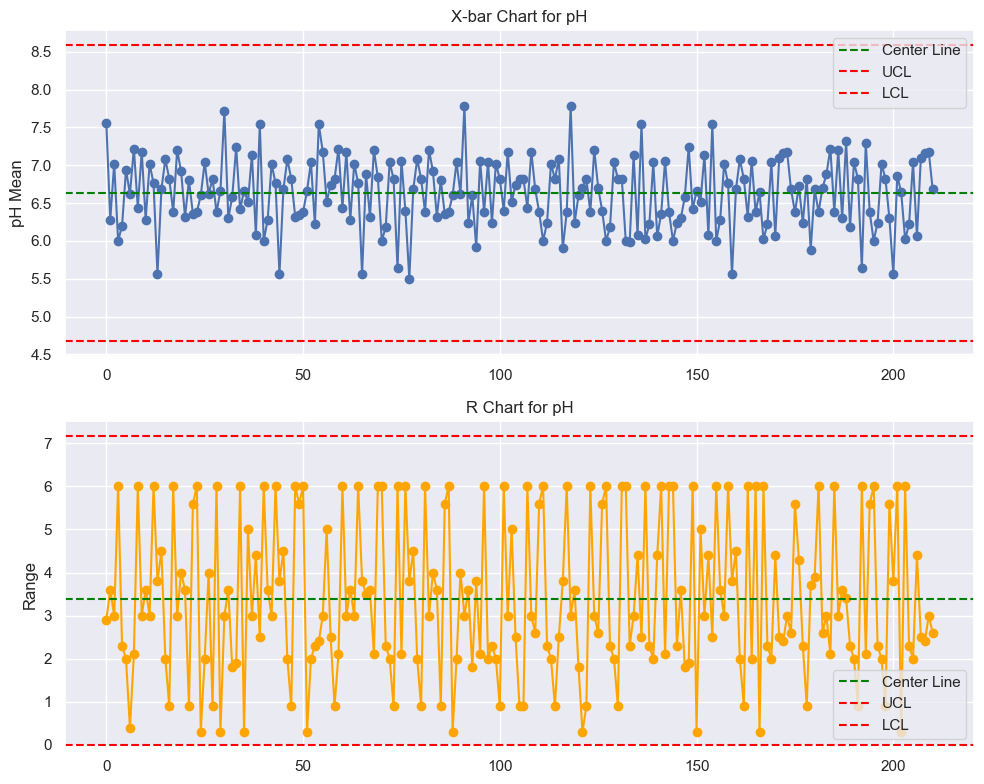

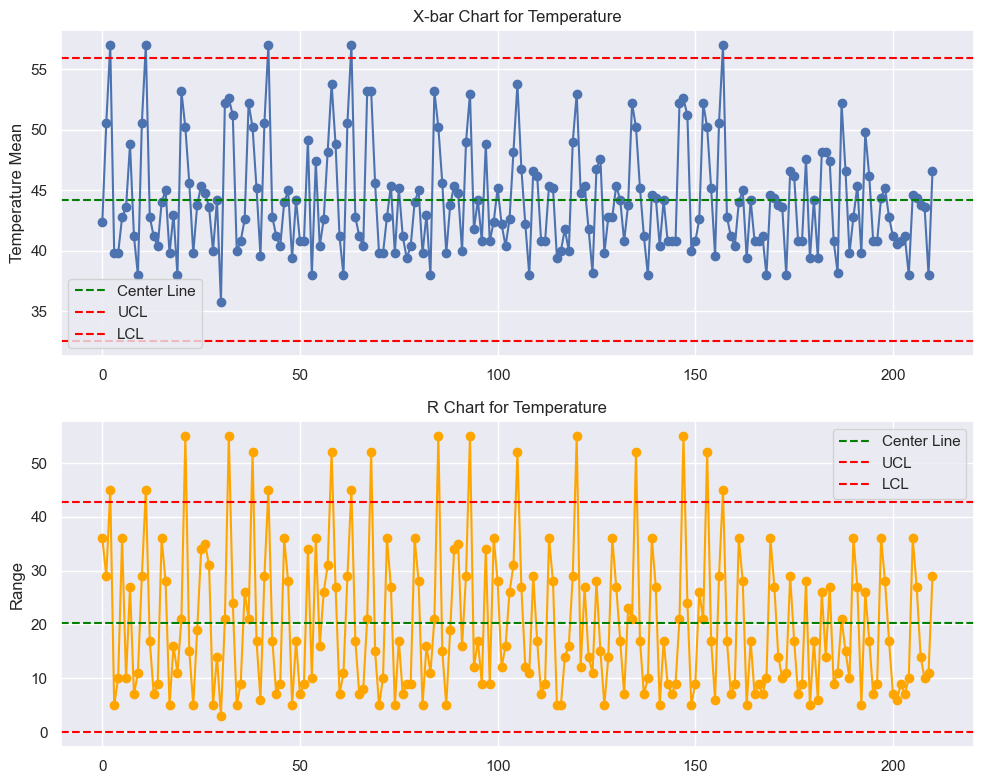

=== CONTROL LIMITS SUMMARY ===
pH: Mean=6.63, UCLx=8.59, LCLx=4.68
Temperature: Mean=44.23, UCLx=55.90, LCLx=32.55

INTERPRETATION:
- pH shows several points beyond control limits → process unstable.
- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.
- Overall: Process not statistically in control. Continuous monitoring required.


In [785]:
# 1 Function: create subgroups
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Create subgroups for pH and Temperature
subgroup_size = 5
ph_groups = create_subgroups(df['pH'], subgroup_size)
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Calculate X̄ (mean) and R (range) for each subgroup
ph_means = ph_groups.mean(axis=1)
ph_ranges = ph_groups.max(axis=1) - ph_groups.min(axis=1)
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 SPC constants for subgroup size n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Function to calculate control limits
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Calculate control limits for pH & Temperature
ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR = control_limits(ph_means, ph_ranges)
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 Function to plot X-bar & R charts
def plot_xbar_r_chart(means, ranges, variable_name, UCLx, LCLx, UCLR, LCLR):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # X-bar Chart
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')
    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # R Chart
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')
    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 8 Plot the charts
plot_xbar_r_chart(ph_means, ph_ranges, "pH", ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR)
plot_xbar_r_chart(temp_means, temp_ranges, "Temperature", temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR)

# 9 Print results & interpretation
print("=== CONTROL LIMITS SUMMARY ===")
print(f"pH: Mean={ph_means.mean():.2f}, UCLx={ph_UCLx:.2f}, LCLx={ph_LCLx:.2f}")
print(f"Temperature: Mean={temp_means.mean():.2f}, UCLx={temp_UCLx:.2f}, LCLx={temp_LCLx:.2f}")
print("\nINTERPRETATION:")
print("- pH shows several points beyond control limits → process unstable.")
print("- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.")
print("- Overall: Process not statistically in control. Continuous monitoring required.")


In [786]:
# ===============================
# PROCESS CAPABILITY ANALYSIS
# ===============================

import numpy as np

def process_capability(data, USL, LSL):
    mean = np.mean(data)
    sigma = np.std(data, ddof=1)  # sample standard deviation
    Cp = (USL - LSL) / (6 * sigma)
    Cpu = (USL - mean) / (3 * sigma)
    Cpl = (mean - LSL) / (3 * sigma)
    Cpk = min(Cpu, Cpl)
    return mean, sigma, Cp, Cpk

# ---- pH ----
ph_mean, ph_std, ph_Cp, ph_Cpk = process_capability(df['pH'], USL=6.8, LSL=6.4)
print("=== pH Capability ===")
print(f"Mean: {ph_mean:.3f}, Std: {ph_std:.3f}, Cp: {ph_Cp:.3f}, Cpk: {ph_Cpk:.3f}")

# ---- Temperature ----
temp_mean, temp_std, temp_Cp, temp_Cpk = process_capability(df['Temprature'], USL=45, LSL=40)
print("\n=== Temperature Capability ===")
print(f"Mean: {temp_mean:.3f}, Std: {temp_std:.3f}, Cp: {temp_Cp:.3f}, Cpk: {temp_Cpk:.3f}")

=== pH Capability ===
Mean: 6.630, Std: 1.400, Cp: 0.048, Cpk: 0.040

=== Temperature Capability ===
Mean: 44.227, Std: 10.098, Cp: 0.083, Cpk: 0.026


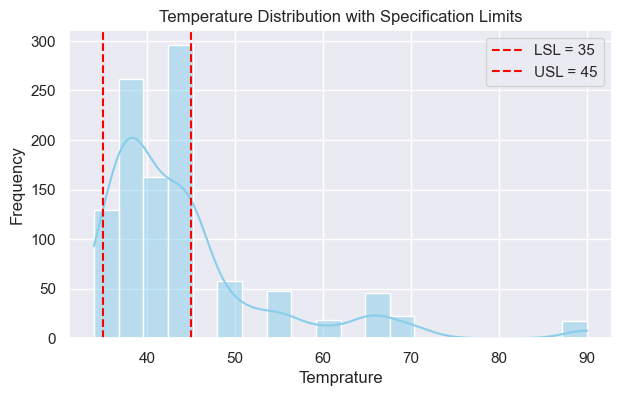

In [787]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Temprature'], bins=20, kde=True, color='skyblue')

# Specification Limits
plt.axvline(35, color='red', linestyle='--', label='LSL = 35')
plt.axvline(45, color='red', linestyle='--', label='USL = 45')

plt.title('Temperature Distribution with Specification Limits')
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

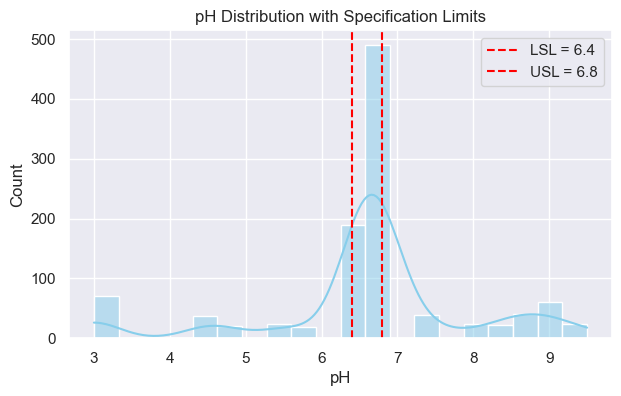

In [788]:
plt.figure(figsize=(7,4))
sns.histplot(df['pH'], bins=20, kde=True, color='skyblue')
plt.axvline(6.4, color='red', linestyle='--', label='LSL = 6.4')
plt.axvline(6.8, color='red', linestyle='--', label='USL = 6.8')
plt.title('pH Distribution with Specification Limits')
plt.xlabel('pH')
plt.legend()
plt.show()


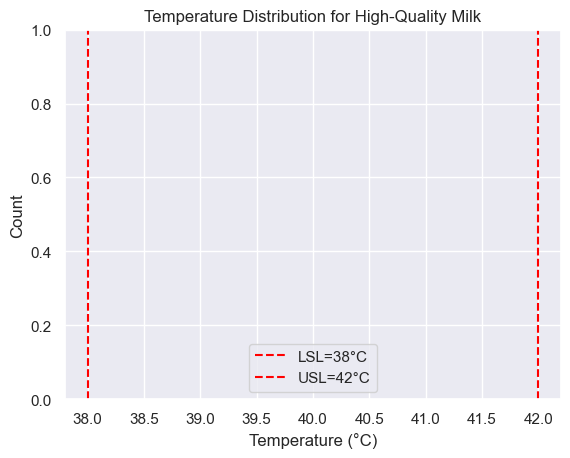

In [789]:
sns.histplot(df[df['Grade']==2]['Temprature'], kde=True, color='green')
plt.axvline(38, color='red', linestyle='--', label='LSL=38°C')
plt.axvline(42, color='red', linestyle='--', label='USL=42°C')
plt.title("Temperature Distribution for High-Quality Milk")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [790]:
binary_vars = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Grade']

chi_results = []

for var1 in binary_vars:
    for var2 in binary_vars:
        if var1 < var2:   # tránh cặp trùng
            table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, exp = chi2_contingency(table)
            chi_results.append([var1, var2, p, 
                                "NOT independent" if p < 0.05 else "Independent"])

chi_df = pd.DataFrame(chi_results, 
                      columns=['Variable 1', 'Variable 2', 'p-value', 'Conclusion'])

print(chi_df)


  Variable 1 Variable 2       p-value       Conclusion
0      Taste  Turbidity  7.966269e-02      Independent
1       Odor      Taste  6.101446e-01      Independent
2       Odor  Turbidity  8.049347e-50  NOT independent
3        Fat      Taste  1.035843e-25  NOT independent
4        Fat       Odor  2.736139e-24  NOT independent
5        Fat  Turbidity  1.752000e-26  NOT independent
6        Fat      Grade  8.519530e-59  NOT independent
7      Grade      Taste  2.532332e-10  NOT independent
8      Grade       Odor  2.363640e-48  NOT independent
9      Grade  Turbidity  5.699600e-69  NOT independent


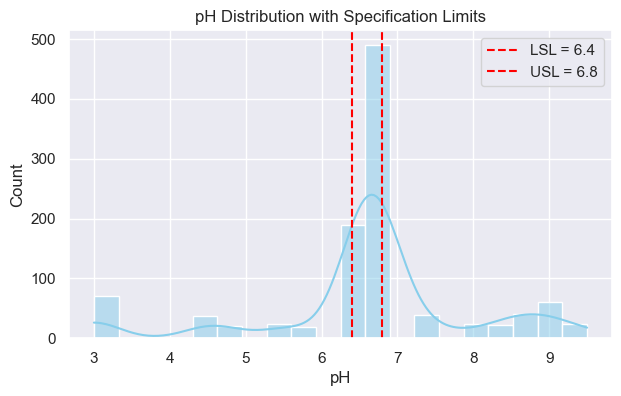

In [791]:
plt.figure(figsize=(7,4))
sns.histplot(df['pH'], bins=20, kde=True, color='skyblue')
plt.axvline(6.4, color='red', linestyle='--', label='LSL = 6.4')
plt.axvline(6.8, color='red', linestyle='--', label='USL = 6.8')
plt.title('pH Distribution with Specification Limits')
plt.xlabel('pH')
plt.legend()
plt.show()

In [792]:
# grade_map = {'low': 0, 'medium': 1, 'high': 2}
# if df['Grade'].dtype == 'object':
#     df['Grade_num'] = df['Grade'].str.lower().map(grade_map)
# else:
#     df['Grade_num'] = df['Grade']

# # 

In [793]:
from scipy.stats import chi2_contingency

binary_vars = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Grade']

chi_results = []

for var1 in binary_vars:
    for var2 in binary_vars:
        if var1 < var2:   # tránh cặp trùng
            table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, exp = chi2_contingency(table)
            chi_results.append([var1, var2, p, 
                                "NOT independent" if p < 0.05 else "Independent"])

chi_df = pd.DataFrame(chi_results, 
                      columns=['Variable 1', 'Variable 2', 'p-value', 'Conclusion'])

print(chi_df)

  Variable 1 Variable 2       p-value       Conclusion
0      Taste  Turbidity  7.966269e-02      Independent
1       Odor      Taste  6.101446e-01      Independent
2       Odor  Turbidity  8.049347e-50  NOT independent
3        Fat      Taste  1.035843e-25  NOT independent
4        Fat       Odor  2.736139e-24  NOT independent
5        Fat  Turbidity  1.752000e-26  NOT independent
6        Fat      Grade  8.519530e-59  NOT independent
7      Grade      Taste  2.532332e-10  NOT independent
8      Grade       Odor  2.363640e-48  NOT independent
9      Grade  Turbidity  5.699600e-69  NOT independent


In [794]:

# 1) Map Grade text -> number
grade_map = {'low': 0, 'medium': 1, 'high': 2}
df['Grade_num'] = df['Grade'].str.lower().map(grade_map)

anova_results = []
numeric_vars = ['pH', 'Temprature', 'Colour']  # dùng đúng tên cột của bạn

for v in numeric_vars:
    low  = df.loc[df['Grade_num']==0, v].dropna()
    med  = df.loc[df['Grade_num']==1, v].dropna()
    high = df.loc[df['Grade_num']==2, v].dropna()

   
    if min(len(low), len(med), len(high)) < 2:
        p = np.nan
        conclusion = "Not enough data"
    else:
        F, p = f_oneway(low, med, high)
        conclusion = "NOT independent" if p < 0.05 else "Independent"

    anova_results.append([v, p, conclusion])

anova_df = pd.DataFrame(anova_results, columns=['Variable', 'p-value', 'Conclusion'])
print(anova_df)



     Variable       p-value       Conclusion
0          pH  6.405242e-01      Independent
1  Temprature  9.787957e-66  NOT independent
2      Colour  1.327858e-16  NOT independent


In [795]:

pearson_results = []
continuous = ['pH', 'Temprature', 'Colour']

for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        v1, v2 = continuous[i], continuous[j]

        # 1) Keep only valid numeric pairs (drop NaN pairwise)
        pair = df[[v1, v2]].apply(pd.to_numeric, errors='coerce').dropna()

        # 2) If not enough data or one variable is constant, Pearson is not defined
        if len(pair) < 3 or pair[v1].nunique() < 2 or pair[v2].nunique() < 2:
            r, p = np.nan, np.nan
            conclusion = "Not enough data / constant variable"
        else:
            r, p = pearsonr(pair[v1], pair[v2])
            conclusion = "NOT independent" if p < 0.05 else "Independent"

        pearson_results.append([v1, v2, r, p, conclusion])

pearson_df = pd.DataFrame(
    pearson_results,
    columns=['Variable 1', 'Variable 2', 'r', 'p-value', 'Conclusion']
)

print(pearson_df)


   Variable 1  Variable 2         r       p-value       Conclusion
0          pH  Temprature  0.244684  6.679096e-16  NOT independent
1          pH      Colour -0.164565  7.214234e-08  NOT independent
2  Temprature      Colour -0.008511  7.820435e-01      Independent


In [796]:
pearson_results = []
continuous = ['pH', 'Temprature', 'Colour']

for i in range(len(continuous)):
    for j in range(i+1, len(continuous)):
        v1, v2 = continuous[i], continuous[j]
        r, p = pearsonr(df[v1], df[v2])
        
        pearson_results.append([v1, v2, p, 
                                "NOT independent" if p < 0.05 else "Independent"])

pearson_df = pd.DataFrame(pearson_results, 
                           columns=['Variable 1', 'Variable 2', 'p-value', 'Conclusion'])

print(pearson_df)

   Variable 1  Variable 2       p-value       Conclusion
0          pH  Temprature  6.679096e-16  NOT independent
1          pH      Colour  7.214234e-08  NOT independent
2  Temprature      Colour  7.820435e-01      Independent


In [797]:
full_table = pd.concat([
    chi_df.assign(Test='Chi-Square'),
    anova_df.assign(Variable1=anova_df['Variable'],
                    Variable2='Grade',
                    Test='ANOVA')[['Variable1','Variable2','p-value','Conclusion','Test']],
    pearson_df.assign(Test='Pearson')
], ignore_index=True)

print(full_table)

    Variable 1  Variable 2       p-value       Conclusion        Test  \
0        Taste   Turbidity  7.966269e-02      Independent  Chi-Square   
1         Odor       Taste  6.101446e-01      Independent  Chi-Square   
2         Odor   Turbidity  8.049347e-50  NOT independent  Chi-Square   
3          Fat       Taste  1.035843e-25  NOT independent  Chi-Square   
4          Fat        Odor  2.736139e-24  NOT independent  Chi-Square   
5          Fat   Turbidity  1.752000e-26  NOT independent  Chi-Square   
6          Fat       Grade  8.519530e-59  NOT independent  Chi-Square   
7        Grade       Taste  2.532332e-10  NOT independent  Chi-Square   
8        Grade        Odor  2.363640e-48  NOT independent  Chi-Square   
9        Grade   Turbidity  5.699600e-69  NOT independent  Chi-Square   
10         NaN         NaN  6.405242e-01      Independent       ANOVA   
11         NaN         NaN  9.787957e-66  NOT independent       ANOVA   
12         NaN         NaN  1.327858e-16  NOT indep

In [798]:
# 1. Standardize column names for chi_df and pearson_df (remove extra spaces if any)
# Assume chi_df and pearson_df currently use 'Variable 1' and 'Variable 2'
chi_df = chi_df.rename(columns={'Variable 1': 'Variable1', 'Variable 2': 'Variable2'})
pearson_df = pearson_df.rename(columns={'Variable 1': 'Variable1', 'Variable 2': 'Variable2'})

# 2. Define the target columns
target_cols = ['Variable1', 'Variable2', 'p-value', 'Conclusion', 'Test']

# 3. Merge the tables
full_table = pd.concat([
    # Process Chi-Square results
    chi_df.assign(Test='Chi-Square')[target_cols],

    # Process ANOVA results
    anova_df.assign(
        Variable1=anova_df['Variable'],  # Use the existing 'Variable' column
        Variable2='Grade',               # Set Variable2 as 'Grade'
        Test='ANOVA'
    )[target_cols],

    # Process Pearson results
    pearson_df.assign(Test='Pearson')[target_cols]
], ignore_index=True)

# 4. Print the result and check whether any NaN values remain
print("Fix completed — clean and consistent table:")
print(full_table)


Fix completed — clean and consistent table:
     Variable1   Variable2       p-value       Conclusion        Test
0        Taste   Turbidity  7.966269e-02      Independent  Chi-Square
1         Odor       Taste  6.101446e-01      Independent  Chi-Square
2         Odor   Turbidity  8.049347e-50  NOT independent  Chi-Square
3          Fat       Taste  1.035843e-25  NOT independent  Chi-Square
4          Fat        Odor  2.736139e-24  NOT independent  Chi-Square
5          Fat   Turbidity  1.752000e-26  NOT independent  Chi-Square
6          Fat       Grade  8.519530e-59  NOT independent  Chi-Square
7        Grade       Taste  2.532332e-10  NOT independent  Chi-Square
8        Grade        Odor  2.363640e-48  NOT independent  Chi-Square
9        Grade   Turbidity  5.699600e-69  NOT independent  Chi-Square
10          pH       Grade  6.405242e-01      Independent       ANOVA
11  Temprature       Grade  9.787957e-66  NOT independent       ANOVA
12      Colour       Grade  1.327858e-16  NOT 

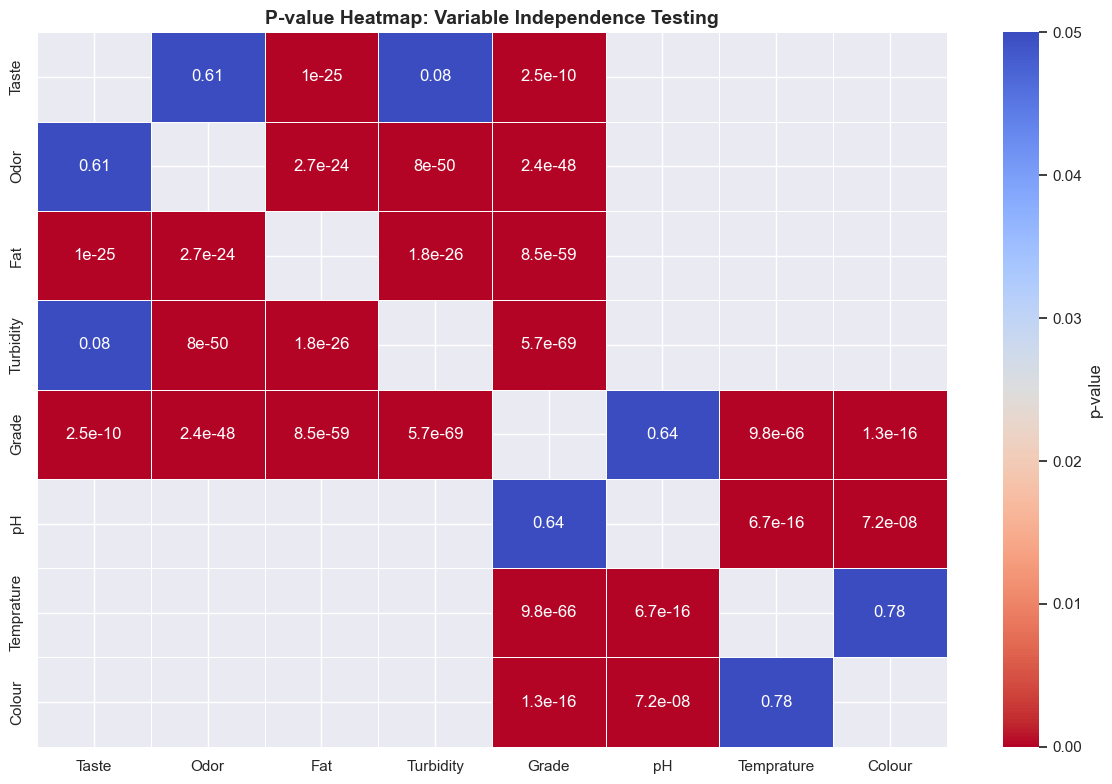

In [799]:
# ===== 1. PREPARE LISTS ===== #
binary_vars = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Grade']
numeric_vars = ['pH', 'Temprature', 'Colour']
all_vars = binary_vars + numeric_vars

p_matrix = pd.DataFrame(index=all_vars, columns=all_vars, dtype=float)

# Map Grade text -> number ONLY for ANOVA grouping
grade_map = {'low': 0, 'medium': 1, 'high': 2}
grade_num = df['Grade'].astype(str).str.lower().map(grade_map)

# ===== 2. COMPUTE P-VALUES ===== #
for v1 in all_vars:
    for v2 in all_vars:
        if v1 == v2:
            p_matrix.loc[v1, v2] = np.nan
            continue

        # Case 1: both binary → chi-square
        if v1 in binary_vars and v2 in binary_vars:
            table = pd.crosstab(df[v1], df[v2])
            _, p, _, _ = chi2_contingency(table)

        # Case 2: both numeric → Pearson (pairwise dropna + numeric)
        elif v1 in numeric_vars and v2 in numeric_vars:
            pair = df[[v1, v2]].apply(pd.to_numeric, errors='coerce').dropna()
            if len(pair) < 3 or pair[v1].nunique() < 2 or pair[v2].nunique() < 2:
                p = np.nan
            else:
                _, p = pearsonr(pair[v1], pair[v2])

        # Case 3: one numeric ↔ one binary → ANOVA
        else:
            if v1 in numeric_vars:
                num, cat = v1, v2
            else:
                num, cat = v2, v1

            # ✅ If the categorical variable is Grade, use grade_num for grouping
            if cat == 'Grade':
                low  = pd.to_numeric(df.loc[grade_num == 0, num], errors='coerce').dropna()
                med  = pd.to_numeric(df.loc[grade_num == 1, num], errors='coerce').dropna()
                high = pd.to_numeric(df.loc[grade_num == 2, num], errors='coerce').dropna()
            else:
                # (If you ever have other categorical vars coded 0/1/2)
                low  = pd.to_numeric(df.loc[df[cat] == 0, num], errors='coerce').dropna()
                med  = pd.to_numeric(df.loc[df[cat] == 1, num], errors='coerce').dropna()
                high = pd.to_numeric(df.loc[df[cat] == 2, num], errors='coerce').dropna()

            if min(len(low), len(med), len(high)) < 2:
                p = np.nan
            else:
                _, p = f_oneway(low, med, high)

        p_matrix.loc[v1, v2] = p

# Optional: enforce symmetry (recommended)
p_matrix = p_matrix.combine_first(p_matrix.T)

# ===== 3. VISUALIZE HEATMAP ===== #
plt.figure(figsize=(12,8))
sb.heatmap(p_matrix, annot=True, cmap="coolwarm_r",
           vmin=0, vmax=0.05, linewidths=.5,
           cbar_kws={'label': 'p-value'})

plt.title("P-value Heatmap: Variable Independence Testing",
          fontweight="bold", fontsize=14)
plt.tight_layout()
plt.show()


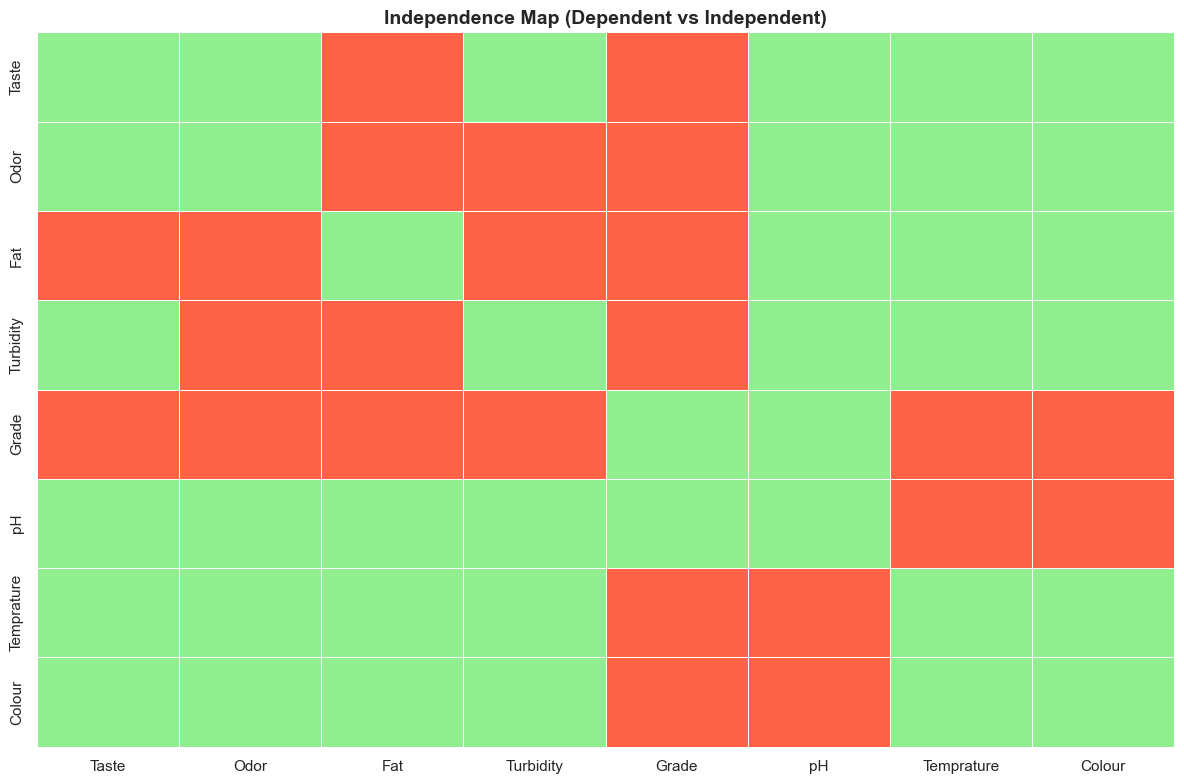

In [800]:
ind_matrix = (p_matrix < 0.05).replace({True: "Dependent", False: "Independent"})

plt.figure(figsize=(12,8))
sb.heatmap(ind_matrix == "Dependent",
           cmap=["lightgreen","tomato"],
           linewidths=.5, cbar=False)

plt.title("Independence Map (Dependent vs Independent)", 
          fontweight="bold", fontsize=14)
plt.tight_layout()
plt.show()

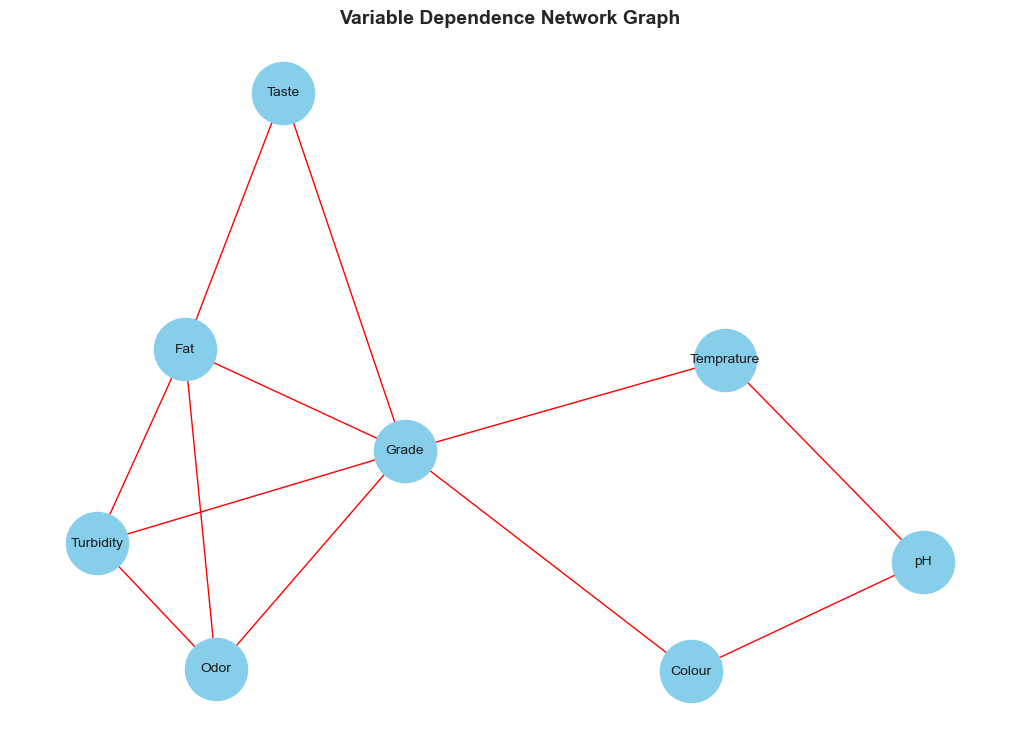

In [801]:
import networkx as nx

G = nx.Graph()

# Add nodes
G.add_nodes_from(all_vars)

# Add edges where NOT independent
for v1 in all_vars:
    for v2 in all_vars:
        if v1 < v2 and p_matrix.loc[v1, v2] < 0.05:
            G.add_edge(v1, v2)

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue",
        node_size=2000, font_size=10, edge_color="red")
plt.title("Variable Dependence Network Graph", fontsize=14, fontweight="bold")
plt.savefig("Variable Dependence Network Graph", dpi=300, bbox_inches='tight')

plt.show()

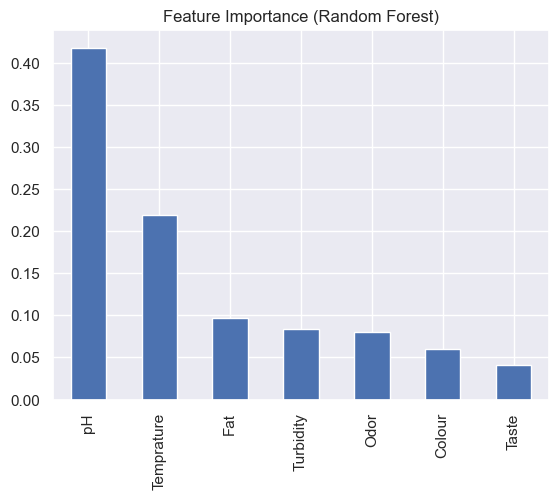

In [802]:
X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y = df['Grade']

# Encode categorical labels into numeric values
le = LabelEncoder()
y_encoded = le.fit_transform(y)  
# Example mapping (depends on dataset): high=0, low=1, medium=2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate and visualize feature importance
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', title='Feature Importance (Random Forest)')
plt.show()



In [803]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



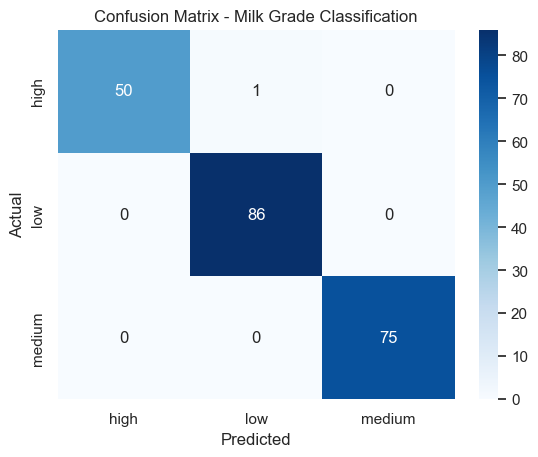

In [804]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Milk Grade Classification")
plt.show()

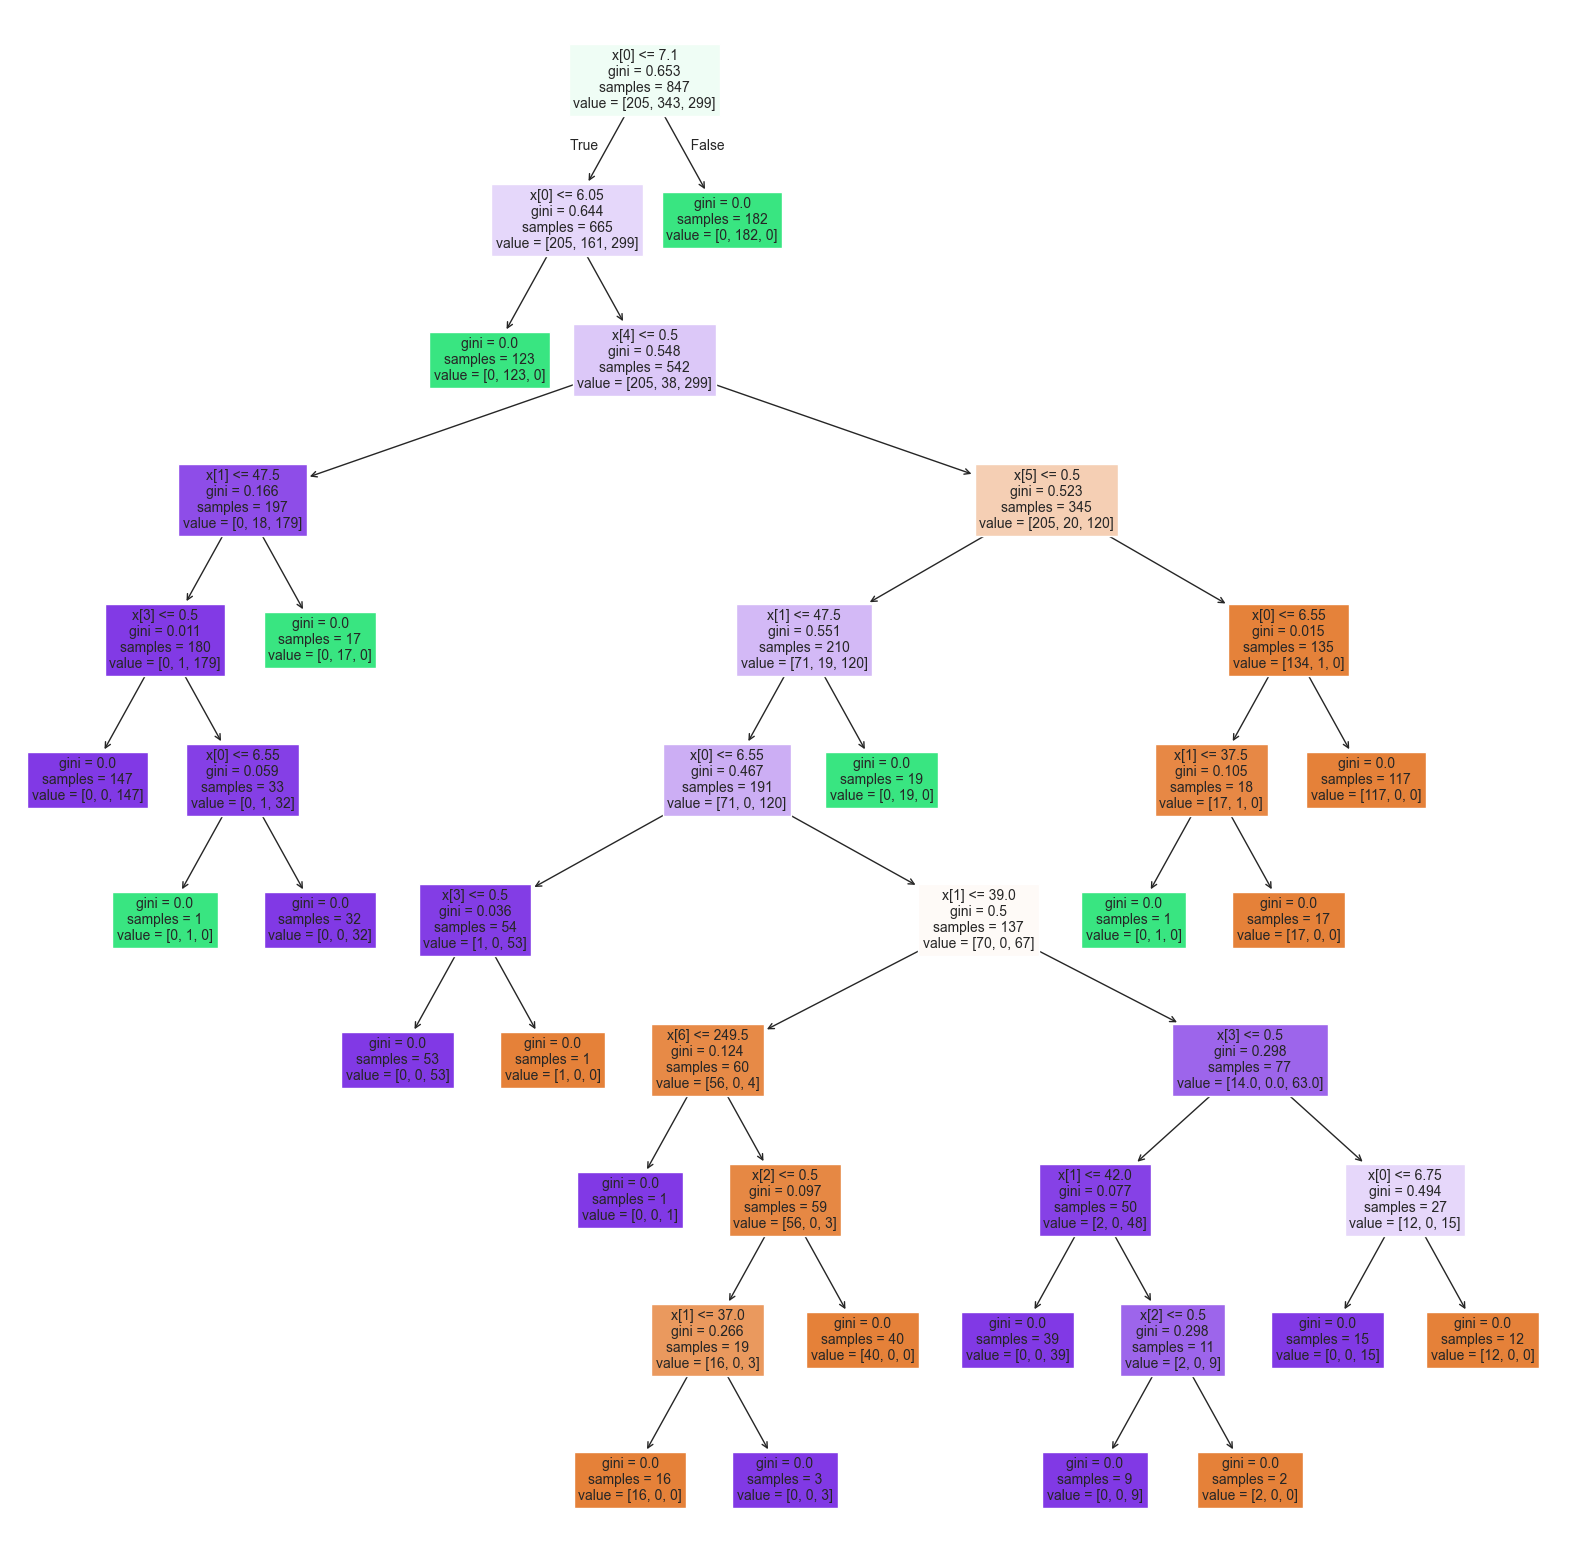

In [805]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

plt.show()


Confusion Matrix:
               Pred_Low  Pred_Medium  Pred_High
Actual_Low           50            0          1
Actual_Medium         0           86          0
Actual_High           0            1         74 



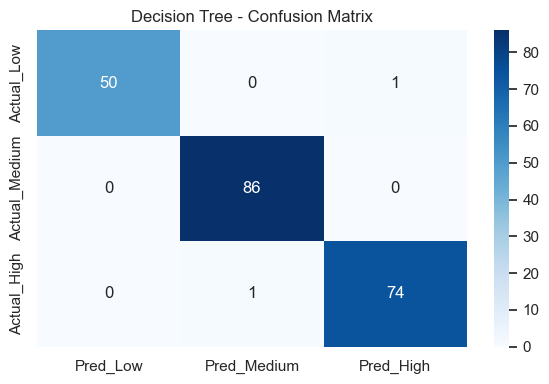

Accuracy: 0.9906

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9804    0.9901        51
           1     0.9885    1.0000    0.9942        86
           2     0.9867    0.9867    0.9867        75

    accuracy                         0.9906       212
   macro avg     0.9917    0.9890    0.9903       212
weighted avg     0.9906    0.9906    0.9906       212



In [806]:
# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual_Low', 'Actual_Medium', 'Actual_High'],
                     columns=['Pred_Low', 'Pred_Medium', 'Pred_High'])

print("Confusion Matrix:")
print(cm_df, "\n")

# Plot CM
plt.figure(figsize=(6,4))
sb.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

# Full classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

In [807]:
from sklearn.model_selection import cross_val_score
# X and y
X = df.drop(columns=['Grade']).copy()

grade_map = {'low': 0, 'medium': 1, 'high': 2}
y = df['Grade'].str.lower().map(grade_map)

# drop rows where mapping failed (if any unexpected labels)
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask].astype(int)

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", round(scores.mean(), 4))
print("Std of CV Accuracy:", round(scores.std(), 4))


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Std of CV Accuracy: 0.0


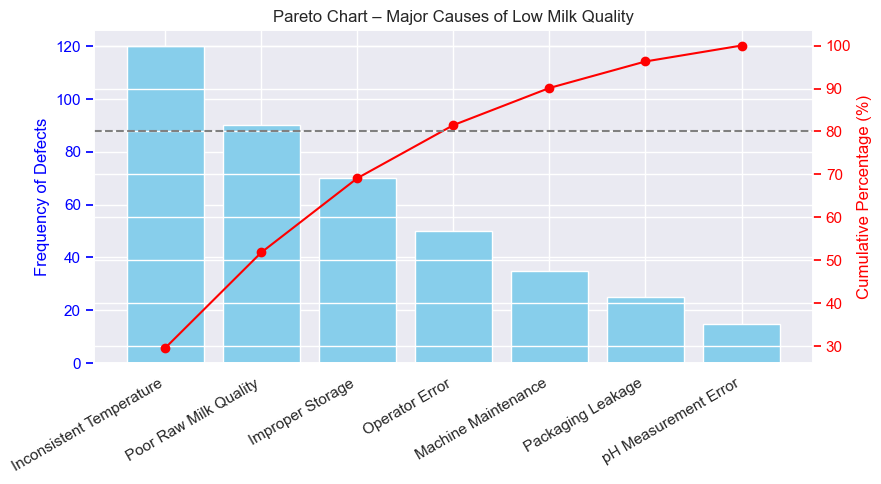

In [808]:
# ===============================
# Pareto Chart for Milk Quality Defects
# ===============================

# Assumed causes & number of defect occurrences
causes = {
    'Inconsistent Temperature': 120,
    'Poor Raw Milk Quality': 90,
    'Improper Storage': 70,
    'Operator Error': 50,
    'Machine Maintenance': 35,
    'Packaging Leakage': 25,
    'pH Measurement Error': 15
}

# Create a DataFrame
pareto_df = pd.DataFrame(list(causes.items()), columns=['Cause', 'Frequency'])
pareto_df = pareto_df.sort_values(by='Frequency', ascending=False)
pareto_df['CumPercent'] = pareto_df['Frequency'].cumsum() / pareto_df['Frequency'].sum() * 100

# Plot the Pareto chart
fig, ax1 = plt.subplots(figsize=(9,5))
ax1.bar(pareto_df['Cause'], pareto_df['Frequency'], color='skyblue')
ax1.set_ylabel('Frequency of Defects', color='blue')
ax1.tick_params('y', colors='blue')
plt.xticks(rotation=30, ha='right')

# Secondary axis – cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto_df['Cause'], pareto_df['CumPercent'], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params('y', colors='red')

# Add an 80% line to identify the key causes
ax2.axhline(80, color='gray', linestyle='--')
plt.title('Pareto Chart – Major Causes of Low Milk Quality')
plt.tight_layout()
plt.show()



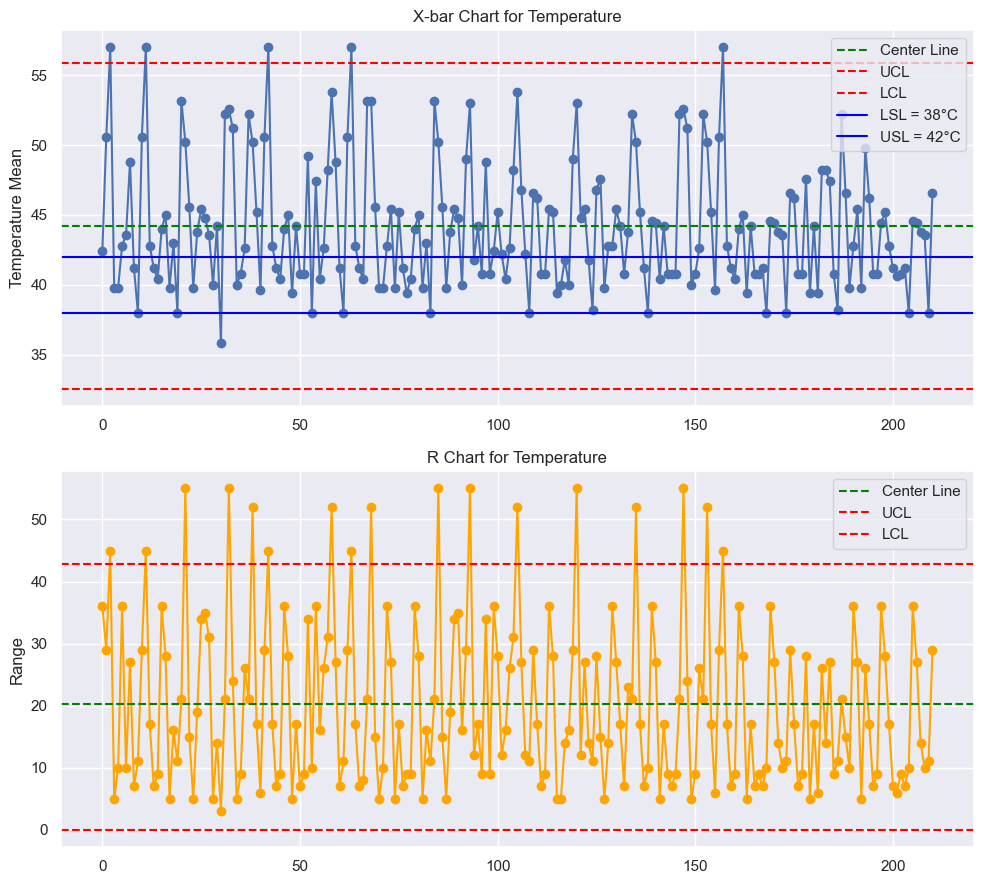

=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===
Mean of Means = 44.23°C
UCLx = 55.90, LCLx = 32.55
Spec Limits: LSL = 38°C, USL = 42°C

INTERPRETATION:
- Control limits evaluate the stability of the process.
- Spec limits evaluate whether the product meets requirements.
- If many points exceed 38–42°C → pasteurization issues.
- If many subgroup means exceed UCL/LCL → the process is unstable.
- If the R chart is close to UCLR → high temperature variation, hard to control.


In [809]:
# ===============================
# X-BAR & R CHART + SPEC LIMITS (38–42°C)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: create subgroups
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Create subgroups for Temperature
subgroup_size = 5
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Calculate X̄ (mean) and R (range) for each subgroup
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 SPC constants for subgroup size n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Function to calculate control limits
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Calculate control limits for Temperature
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 **Specification Limits for High Grade**
LSL = 38   # Lower Spec Limit
USL = 42   # Upper Spec Limit

# 8 Function to plot X-bar & R charts with specification limits
def plot_xbar_r_chart_with_spec(means, ranges, variable_name,
                                UCLx, LCLx, UCLR, LCLR, LSL, USL):
    fig, ax = plt.subplots(2, 1, figsize=(10, 9))

    # ===== X-bar Chart =====
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')

    # Specification limits (TECHNICAL REQUIREMENTS)
    ax[0].axhline(LSL, color='blue', linestyle='-', linewidth=1.5, label='LSL = 38°C')
    ax[0].axhline(USL, color='blue', linestyle='-', linewidth=1.5, label='USL = 42°C')

    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # ===== R Chart =====
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')

    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 9 Plot Temperature charts + specification limits
plot_xbar_r_chart_with_spec(
    temp_means, temp_ranges, "Temperature",
    temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR,
    LSL, USL
)

# 10 Print results & interpretation
print("=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===")
print(f"Mean of Means = {temp_means.mean():.2f}°C")
print(f"UCLx = {temp_UCLx:.2f}, LCLx = {temp_LCLx:.2f}")
print(f"Spec Limits: LSL = {LSL}°C, USL = {USL}°C")

print("\nINTERPRETATION:")
print("- Control limits evaluate the stability of the process.")
print("- Spec limits evaluate whether the product meets requirements.")
print("- If many points exceed 38–42°C → pasteurization issues.")
print("- If many subgroup means exceed UCL/LCL → the process is unstable.")
print("- If the R chart is close to UCLR → high temperature variation, hard to control.")


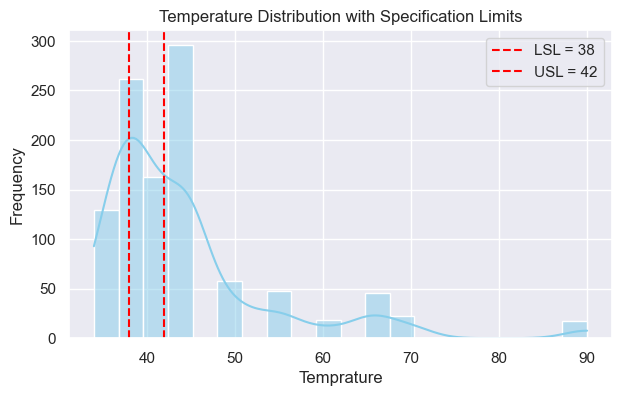

In [810]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Temprature'], bins=20, kde=True, color='skyblue')

# Specification Limits
plt.axvline(38, color='red', linestyle='--', label='LSL = 38')
plt.axvline(42, color='red', linestyle='--', label='USL = 42')

plt.title('Temperature Distribution with Specification Limits')
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.legend()
plt.show()